# Crop Recommendation System using Logistic Regression

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [12]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Data Visualization

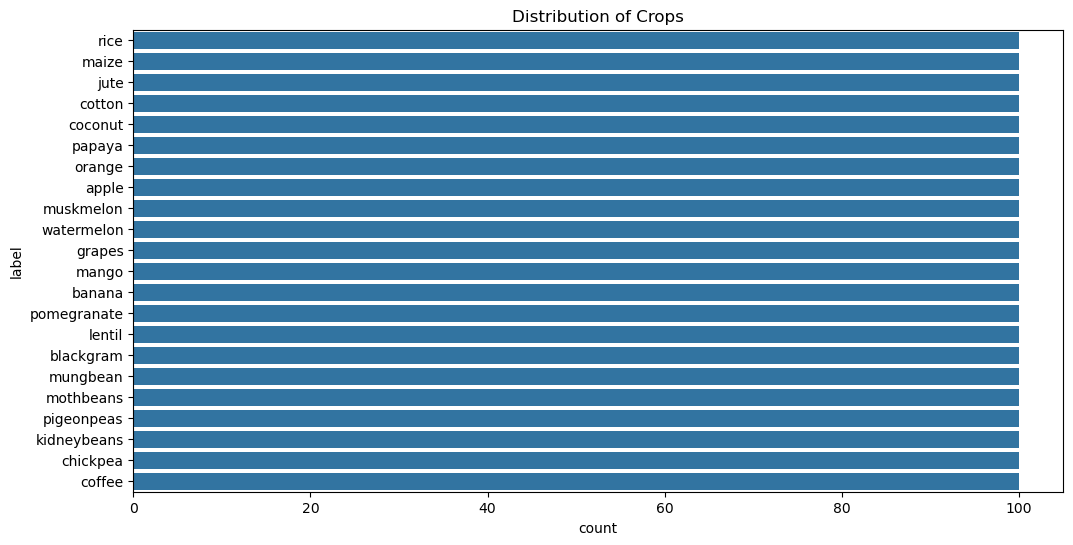

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribution of Crops')
plt.show()

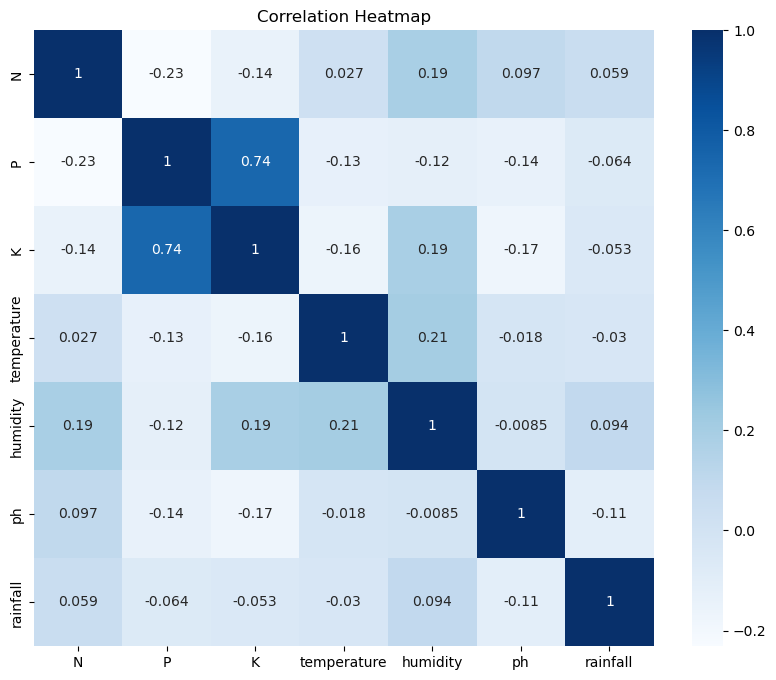

In [40]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## Creating a **LOGISTIC REGRESSION** model which takes only soil data(N,P,K)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [17]:
features_1 = df[['N', 'P','K']]
target = df['label']
labels = df['label']

In [18]:
Xtrain_1, Xtest_1, Ytrain_1, Ytest_1 = train_test_split(features_1,target,test_size = 0.2,random_state =2)

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg_1 = LogisticRegression(random_state=2)

LogReg_1.fit(Xtrain_1,Ytrain_1)

predicted_values_1 = LogReg_1.predict(Xtest_1)

In [20]:
x_1 = metrics.accuracy_score(Ytest_1, predicted_values_1)
print("Logistic Regression's Accuracy is: ", x_1)

print(classification_report(Ytest_1,predicted_values_1))

Logistic Regression's Accuracy is:  0.44545454545454544
              precision    recall  f1-score   support

       apple       0.27      0.46      0.34        13
      banana       0.68      1.00      0.81        17
   blackgram       0.25      0.44      0.32        16
    chickpea       0.63      0.90      0.75        21
     coconut       0.21      0.19      0.20        21
      coffee       0.78      0.95      0.86        22
      cotton       1.00      0.90      0.95        20
      grapes       0.57      0.67      0.62        18
        jute       0.50      0.07      0.12        28
 kidneybeans       0.09      0.14      0.11        14
      lentil       0.46      0.26      0.33        23
       maize       0.64      1.00      0.78        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.30      0.53      0.38        19
    mungbean       0.00      0.00      0.00        24
   muskmelon       0.38      0.22      0.28        23
      orange       0.00  

In [21]:
score_1 = cross_val_score(LogReg_1,features_1,target,cv=5)
score_1

array([0.50227273, 0.51590909, 0.48409091, 0.5       , 0.49090909])

## Creating a model which contains soil data, temperature, ph, humidity

In [22]:
features_2 = df[['N', 'P','K','temperature', 'humidity', 'ph']]
target = df['label']
labels = df['label']

In [23]:
Xtrain_2, Xtest_2, Ytrain_2, Ytest_2 = train_test_split(features_2,target,test_size = 0.2,random_state =2)

In [24]:
from sklearn.linear_model import LogisticRegression

LogReg_2 = LogisticRegression(random_state=2)

LogReg_2.fit(Xtrain_2,Ytrain_2)

predicted_values_2 = LogReg_2.predict(Xtest_2)

x_2 = metrics.accuracy_score(Ytest_2, predicted_values_2)
print("Logistic Regression's Accuracy is: ", x_2)

print(classification_report(Ytest_2,predicted_values_2))

Logistic Regression's Accuracy is:  0.8886363636363637
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      0.62      0.61        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.78      0.50      0.61        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.81      0.74      0.77        23
       maize       0.95      0.95      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.70      0.84      0.76        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       0.86      0.78      0.82        23
      orange       1.00   

In [25]:
score_2 = cross_val_score(LogReg_2,features_2,target,cv=5)
score_2

array([0.88181818, 0.87954545, 0.90454545, 0.89318182, 0.87727273])

## Building a model which contains all the data including rainfall

In [26]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)


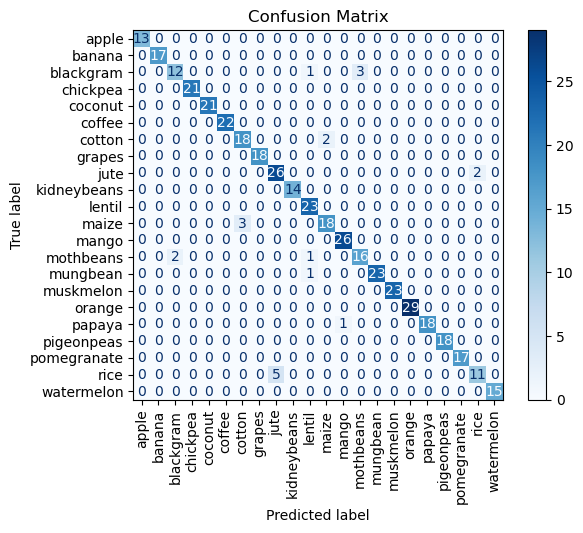

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Ytest, predicted_values )  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Ytest))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [30]:
x = metrics.accuracy_score(Ytest, predicted_values)

print("Logistic Regression's Accuracy is: ", x)


Logistic Regression's Accuracy is:  0.9522727272727273


In [31]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [32]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

## Making the prediction

In [33]:
data = np.array([[104,18, 30]])
prediction = LogReg_1.predict(data)
print(prediction)

['coffee']


In [34]:
data = np.array([[104,18, 30, 67, 578, 38]])
prediction = LogReg_2.predict(data)
print(prediction)

['orange']


In [35]:
data = np.array([[104,18, 30, 67, 578, 38,190]])
prediction = LogReg.predict(data)
print(prediction)

['mungbean']


In [36]:
data = np.array([[83, 45, 60]])
prediction = LogReg_1.predict(data)
print(prediction)

['jute']


In [37]:
data = np.array([[83, 45, 60, 78, 79.3, 16.0]])
prediction = LogReg_2.predict(data)
print(prediction)

['mango']


In [38]:
data = np.array([[83, 45, 60, 78, 79.3, 16.0, 13.9]])
prediction = LogReg.predict(data)
print(prediction)

['muskmelon']


In [43]:
data = np.array([[10,22,30,45,45,23,45]])
prediction = LogReg.predict(data)
print(prediction)

['mothbeans']
